# Importando as libs

In [275]:
!pip install pandasql

In [310]:
import pandas as pd
from pandasql import sqldf
from datetime import datetime
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

# Leitura dos arquivos

In [474]:
#Tabela Customers
df_customers = pd.read_csv("Customers.csv")

#Tabela Events
df_events = pd.read_csv("Events.csv")

#Tabela Transactions
df_transactions = pd.read_csv("Transactions.csv")

# Tabela Customers

In [312]:
df_customers.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance
0,60a7d0011363ea0011d0eb80,192260,601.525833,2021-06-10 21:23:31,100.013269,5,0,250.0,3000.0,14,22.22
1,60c77e1ffdaebd001875353e,192853,1798.831206,2021-06-14 16:13:56,300.048411,2,0,8000.0,180000.0,35,77.78
2,588f45ae0a760bb65b380afa,11897,1621.043680,2017-09-14 12:08:06,2500.000000,13,2,4500.0,0.0,32,17.00
3,5915d73623d4b1881694e11e,12583,78643.814178,2017-09-25 15:44:40,2005.000000,37,7,18000.0,120000.0,34,69.17
4,591f5f3b3daa47c6488bce3f,5564,422.691159,2017-05-22 18:38:05,2000.000000,23,7,2000.0,45000.0,29,0.00


In [675]:
#Dataset Tail
df_customers.tail(3)

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance
997,5fc5378f7734810010efeaf5,157300,6635.921337,2020-12-01 14:16:51,1004.29,13,1,1398,2800.0,22,14.5
998,5d13603af71a7c00103c0f32,84593,140.934195,2019-07-05 13:52:24,2400.00,1,1,12000,0.0,33,14.0
999,5f6a22bed0c1c00011fc91e0,149918,321.246212,2020-09-22 21:55:55,100.00,5,1,600,1182.0,21,16.0


In [313]:
#Verificando linhas e colunas
df_customers.shape

(1000, 11)

In [677]:
#Listagem das features
list(df_customers)

['CustomerApiid',
 'CustomerId',
 'AUM',
 'RegisterDate',
 'AmountFirstDeposit',
 'TotalDeposits',
 'TotalWithdrawals',
 'MonthlyIncome',
 'FinancialInvestmentsValue',
 'Age',
 'ComputedRiskTolerance']

In [678]:
pd.DataFrame(round(df_customers.isnull().mean().sort_values(ascending=False),3), columns=['% Missing Data']).head()

,% Missing Data
CustomerApiid,0.0
CustomerId,0.0
AUM,0.0
RegisterDate,0.0
AmountFirstDeposit,0.0


In [683]:
#Descrição das features numéricas
round(df_customers.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
CustomerId,1000.0,113653.85,55113.27,44.0,69583.00,123887.50,161280.00,197630.00
AUM,1000.0,91684.64,731956.82,0.0,100.01,3877.40,21399.47,15097244.38
AmountFirstDeposit,1000.0,25710.74,273690.80,1.0,120.00,847.94,4849.75,8000373.45
TotalDeposits,1000.0,18.88,24.28,1.0,4.00,11.00,23.25,224.00
TotalWithdrawals,1000.0,3.74,6.58,0.0,0.00,1.50,5.00,86.00
MonthlyIncome,1000.0,32588.98,513055.90,0.0,2000.00,4000.00,8000.00,15000000.00
FinancialInvestmentsValue,1000.0,117110.86,577946.53,0.0,0.00,1000.00,30000.00,11000000.00
Age,1000.0,33.49,11.30,0.0,26.00,31.00,38.00,90.00
ComputedRiskTolerance,1000.0,24.07,15.30,0.0,14.00,20.00,27.00,96.30


- Olhando para o resumo de valores, podemos ver que existem pessoas com idade igual a zero e abaixo dos 18 anos. Há ainda, pessoas com renda mensal zerada e declaração de valores investidos zerada ou muito altos. Os outliers serão analisados na próxima sessão


In [684]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerApiid              1000 non-null   object 
 1   CustomerId                 1000 non-null   int64  
 2   AUM                        1000 non-null   float64
 3   RegisterDate               1000 non-null   object 
 4   AmountFirstDeposit         1000 non-null   float64
 5   TotalDeposits              1000 non-null   int64  
 6   TotalWithdrawals           1000 non-null   int64  
 7   MonthlyIncome              1000 non-null   int32  
 8   FinancialInvestmentsValue  1000 non-null   float64
 9   Age                        1000 non-null   int64  
 10  ComputedRiskTolerance      1000 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(2)
memory usage: 82.2+ KB


In [685]:
#Convertendo a coluna de 'RegisterDate' para datetime

df_customers['RegisterDate'] = pd.to_datetime(df_customers['RegisterDate'], format='%Y-%m-%d %H:%M:%S')
print(df_customers.dtypes)

CustomerApiid                        object
CustomerId                            int64
AUM                                 float64
RegisterDate                 datetime64[ns]
AmountFirstDeposit                  float64
TotalDeposits                         int64
TotalWithdrawals                      int64
MonthlyIncome                         int32
FinancialInvestmentsValue           float64
Age                                   int64
ComputedRiskTolerance               float64
dtype: object


In [686]:
#Convertendo a coluna de 'AUM' para int
df_customers['AUM'] = df_customers['AUM'].astype(int)

# Tabela Events

In [318]:
df_events.head()

,EventDate,Platform,CustomerApiid
0,20210112,IOS,5eb045b00d281d0010993b19
1,20210112,IOS,5d54036d7a4e2a00129ac685
2,20210112,IOS,5f160ad08df61f00175d4a94
3,20210112,IOS,5e1f7e25a6a96a0010ee1545
4,20210112,IOS,5e66a9a9e7bbca00119eb5fc


In [319]:
df_events.shape

(1000, 3)

In [320]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EventDate      1000 non-null   int64 
 1   Platform       1000 non-null   object
 2   CustomerApiid  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [321]:
#Convertendo a coluna de 'EventDate' para datetime

df_events['EventDate'] = pd.to_datetime(df_events['EventDate'], format='%Y%m%d')
print(df_events.dtypes)

EventDate        datetime64[ns]
Platform                 object
CustomerApiid            object
dtype: object


# Tabela Transactions

In [497]:
df_transactions = pd.read_csv("Transactions.csv")

In [499]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 260 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          1000 non-null   int64  
 1   Direction   1000 non-null   int64  
 2   Amount      1000 non-null   float64
 3   CustomerId  1000 non-null   int64  
 4   OperatedAt  1000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 46.9+ KB


In [534]:
df_transactions.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1000.0,1.180722e+06,73083.958545,456538.0,1.192801e+06,1199063.5,1201338.25,1.201975e+06
Direction,1000.0,1.188000e+01,3.909077,10.0,1.000000e+01,10.0,10.00,2.000000e+01
Amount,1000.0,2.357222e+03,9808.965386,1.0,1.695555e+02,500.0,1200.00,1.579400e+05
CustomerId,1000.0,9.357191e+04,48098.081659,22.0,5.196000e+04,101758.5,136931.25,1.614100e+05
Month,1000.0,1.143000e+00,0.705016,1.0,1.000000e+00,1.0,1.00,7.000000e+00
Year,1000.0,2.021000e+03,0.000000,2021.0,2.021000e+03,2021.0,2021.00,2.021000e+03


#### A trabela Transactions possui registros apenas do ano de 2021 entre os meses de janeiro (01)  a julho (07)

In [500]:
#Convertendo a coluna de 'OperatedAt' para datetime

df_transactions['OperatedAt'] = pd.to_datetime(df_transactions['OperatedAt'], format='%Y-%m-%d %H:%M:%S')
print(df_transactions.dtypes)

Id                     int64
Direction              int64
Amount               float64
CustomerId             int64
OperatedAt    datetime64[ns]
dtype: object


In [501]:
#Criando a coluna Month para guardar o registro de mês
df_transactions['Month'] = pd.to_datetime(df_transactions['OperatedAt']).dt.month


#Criando a coluna Year para guardar o registro de ano
df_transactions['Year'] = pd.to_datetime(df_transactions['OperatedAt']).dt.year

#Ordenando as transações por data
df_transactions.sort_values(by=['Month', 'Year'], inplace=True, ascending=True)
df_transactions.head()

,Id,Direction,Amount,CustomerId,OperatedAt,Month,Year
260,1193306,10,12800.00,12431,2021-01-01 00:00:30,1,2021
573,1200034,10,20000.00,117985,2021-01-01 00:01:33,1,2021
452,1198402,10,50.00,95724,2021-01-01 00:02:08,1,2021
521,1199295,10,200.00,136323,2021-01-01 00:02:35,1,2021
486,1198878,10,2000.00,138207,2021-01-01 00:02:58,1,2021
442,1198295,10,300.00,116255,2021-01-01 00:04:00,1,2021
346,1195804,10,100.00,16655,2021-01-01 00:04:16,1,2021
467,1198751,10,600.00,86678,2021-01-01 00:04:44,1,2021
408,1197389,10,6000.00,39685,2021-01-01 00:05:36,1,2021
555,1199823,10,50.00,148881,2021-01-01 00:05:41,1,2021


___

### Verificando o montante de Saídas

In [536]:
df_out = df_transactions[df_transactions['Direction'] == 20]
print(df_out['Amount'].sum().round(2))

867867.13


###### O montante de saídas em 2021 foi de 867.867,13
###### - Esse valor está em real?

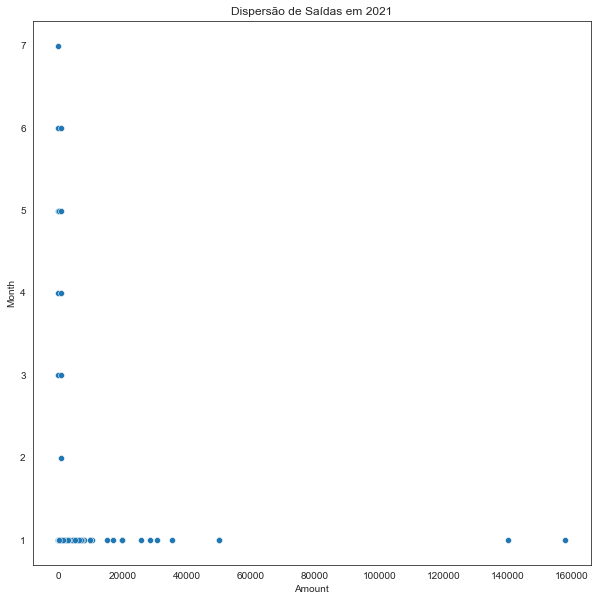

In [525]:
# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))
plt.title('Dispersão de Saídas em 2021')

# Gráfico de Dispersão
g = sns.scatterplot(x="Amount", y="Month", 
                    data=df_out)
plt.show()

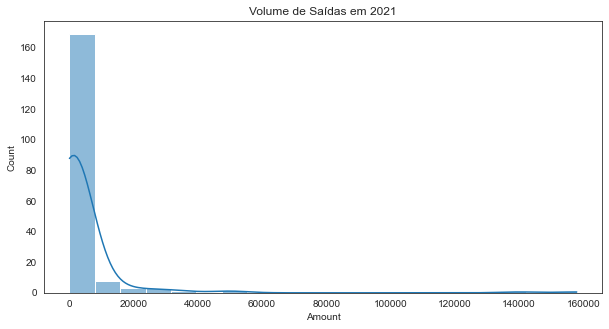

In [546]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_out, x='Amount', bins=20, kde=True)
plt.title('Volume de Saídas em 2021')
plt.show()

#### Nota-se que não houve retiradas de grandes volumes no ano de 2021, contudo há registros de saídas com valores acima de 20.000

## Montante de Entradas


In [537]:
df_in = df_transactions[df_transactions['Direction'] == 10]
print(df_in['Amount'].sum().round(2))

1489354.96


###### O montante de saídas em 2021 foi de 1.489.354,96
###### - Esse valor está em real?

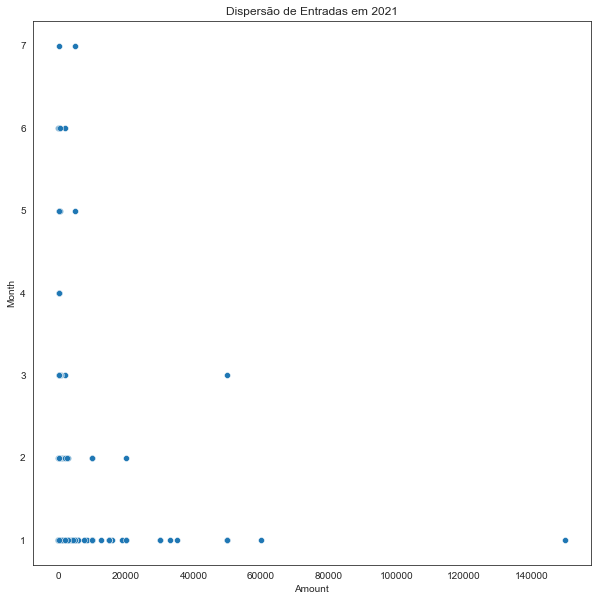

In [539]:
# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))
plt.title('Dispersão de Entradas em 2021')

# Gráfico de Dispersão
g = sns.scatterplot(x="Amount", y="Month", 
                    data=df_in)
plt.show()

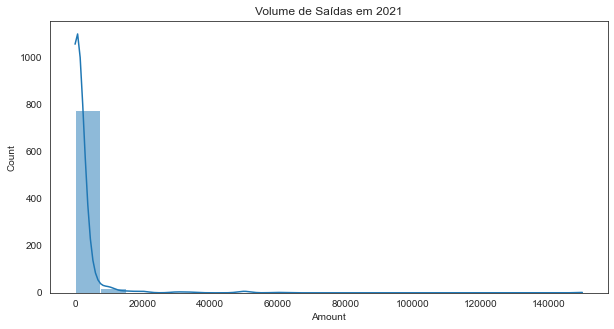

In [548]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_in, x='Amount', bins=20, kde=True)
plt.title('Volume de Saídas em 2021')
plt.show()

___

In [550]:
df_in.head(2)

,Id,Direction,Amount,CustomerId,OperatedAt,Month,Year
260,1193306,10,12800.0,12431,2021-01-01 00:00:30,1,2021
573,1200034,10,20000.0,117985,2021-01-01 00:01:33,1,2021


___


# Perfil do Público

### O perfil do público da Warren trata-se, em sua maioria, de pessoas cuja idade está entre 20 e 40 anos, a renda mensal mais expressiva está abaixo de 10.000 reais e a declaração do total de bens investidos está abaixo dos 25.000 reais

In [829]:
#Tabela Customers
df_customers.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance
0,60a7d0011363ea0011d0eb80,192260,601,2021-06-10 21:23:31,100.013269,5,0,250,3000.0,14,22.22
1,60c77e1ffdaebd001875353e,192853,1798,2021-06-14 16:13:56,300.048411,2,0,8000,180000.0,35,77.78
2,588f45ae0a760bb65b380afa,11897,1621,2017-09-14 12:08:06,2500.000000,13,2,4500,0.0,32,17.00
3,5915d73623d4b1881694e11e,12583,78643,2017-09-25 15:44:40,2005.000000,37,7,18000,120000.0,34,69.17
4,591f5f3b3daa47c6488bce3f,5564,422,2017-05-22 18:38:05,2000.000000,23,7,2000,45000.0,29,0.00


### Idade

In [689]:
df_customers['Age'].value_counts()

30    67
25    56
33    55
29    49
28    49
      ..
69     1
17     1
6      1
15     1
90     1
Name: Age, Length: 65, dtype: int64

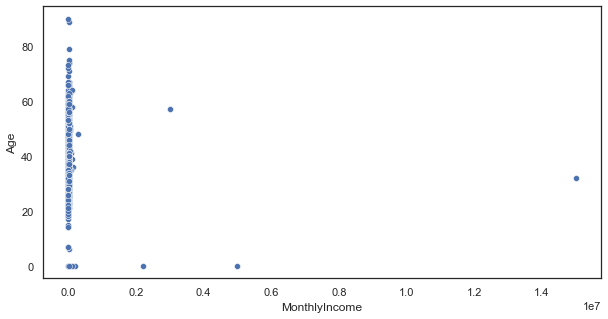

In [690]:
# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 5))

# Gráfico de Dispersão
g = sns.scatterplot(x="MonthlyIncome", y="Age", 
                    data=df_customers)
plt.show()

<AxesSubplot:title={'center':'Idades'}, ylabel='Frequency'>

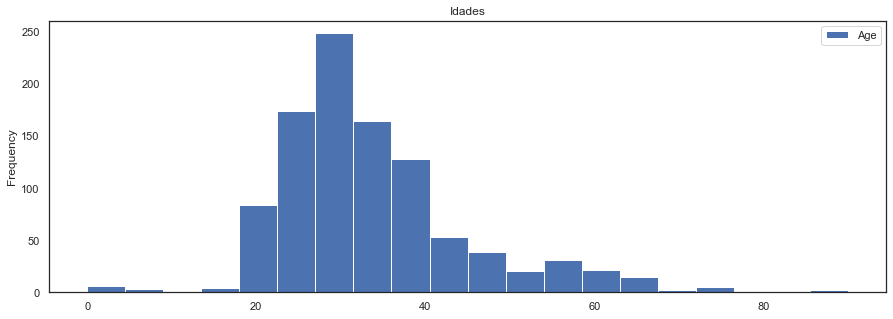

In [751]:
df_customers[['Age']].plot.hist(bins = 20, title = 'Idades')

#### Existem registros de pessoas com idade menor do que 18 anos. Optou-se por dropar entendendo que estes dados podem ser considerador outliers uma vez que para ser um investidor no Brasil, a idade mínima é de 18 anos

In [775]:
#Dropando registros de idade menor que 18 anos
df_profile = df_customers[df_customers['Age'] > 18]

<AxesSubplot:title={'center':'Idades'}, ylabel='Frequency'>

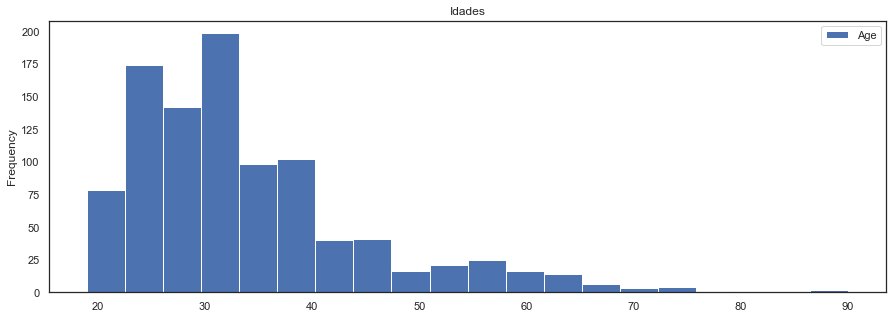

In [777]:
df_profile[['Age']].plot.hist(bins = 20, title = 'Idades')

## Renda Mensal

In [778]:
df_profile.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance
1,60c77e1ffdaebd001875353e,192853,1798,2021-06-14 16:13:56,300.048411,2,0,8000,180000.0,35,77.78
2,588f45ae0a760bb65b380afa,11897,1621,2017-09-14 12:08:06,2500.000000,13,2,4500,0.0,32,17.00
3,5915d73623d4b1881694e11e,12583,78643,2017-09-25 15:44:40,2005.000000,37,7,18000,120000.0,34,69.17
4,591f5f3b3daa47c6488bce3f,5564,422,2017-05-22 18:38:05,2000.000000,23,7,2000,45000.0,29,0.00
5,5966a3dc3d3c271d31a9e17f,7597,1703,2017-07-13 15:11:03,1000.000000,52,30,8800,0.0,31,15.50


In [779]:
df_profile['MonthlyIncome'].value_counts()

5000     66
10000    52
3000     51
2000     44
4000     42
         ..
26000     1
360       1
2401      1
1520      1
17400     1
Name: MonthlyIncome, Length: 191, dtype: int64

<AxesSubplot:title={'center':'Renda mensal'}, ylabel='Frequency'>

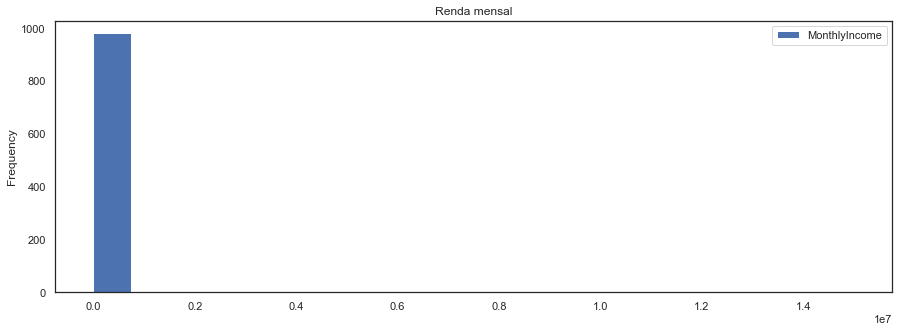

In [780]:
df_profile[['MonthlyIncome']].plot.hist(bins = 20, title = 'Renda mensal')

<AxesSubplot:ylabel='Frequency'>

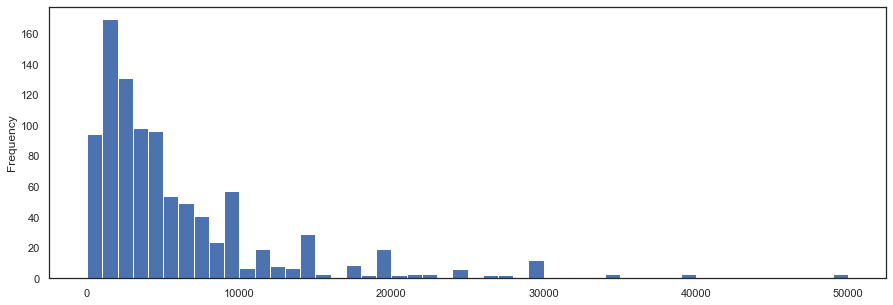

In [781]:
#Filtro por renda mensal maior que 0 e menor que R$ 50.000
df_profile[(df_profile['MonthlyIncome'] > 0) & (df_profile['MonthlyIncome'] <= 50000)]['MonthlyIncome'].plot(kind='hist', bins=50)

#### Pessoas com renda mensal até 50 mil reais investem no Warren. Contudo, há uma incidência menor para perfis com salários acima de 20 mil reais

In [791]:
#Limpeza da base removendo os outliers para feature de renda mensal
df_profile = df_customers[(df_customers['MonthlyIncome'] > 0) & (df_customers['MonthlyIncome'] <= 50000)]

## Valor declarado que o cliente tem investido

<AxesSubplot:title={'center':'Valor Investido'}, ylabel='Frequency'>

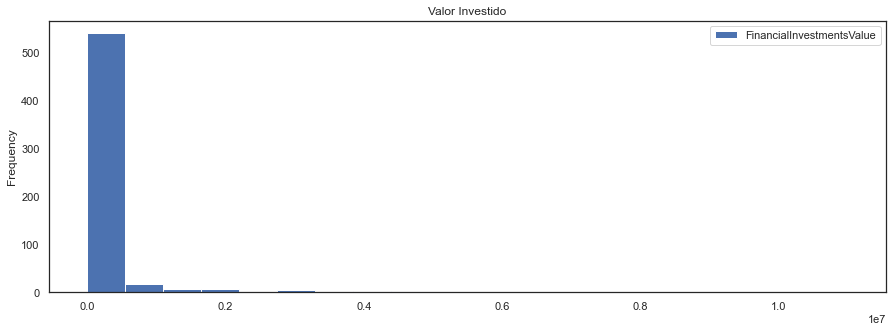

In [799]:
df_profile[['FinancialInvestmentsValue']].plot.hist(bins = 20, title = 'Valor Investido')

In [797]:
df_profile = df_customers[df_customers['FinancialInvestmentsValue'] > 0]

<AxesSubplot:ylabel='Frequency'>

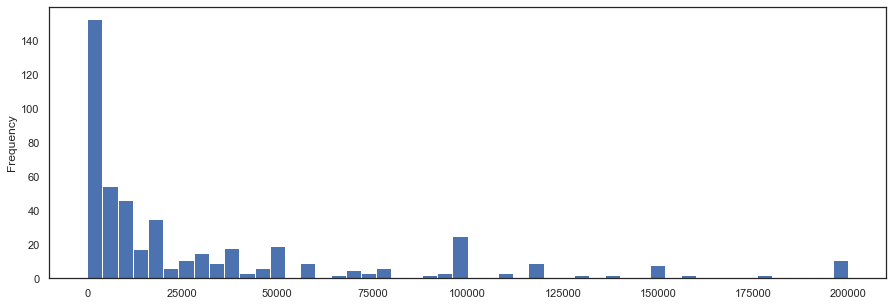

In [813]:
df_profile[(df_profile['FinancialInvestmentsValue'] > 0) & (df_profile['FinancialInvestmentsValue'] <= 200000)]['FinancialInvestmentsValue'].plot(kind='hist', bins=50)

##### Seguindo no perfil das pessoas investidoras, nota-se que a maioria possui menos de 25.000 reais em investimentos

In [817]:
#Removendo outliers para maior granularidade
df_profile = df_profile[(df_profile['FinancialInvestmentsValue'] > 0) & (df_profile['FinancialInvestmentsValue'] <= 200000)]


<AxesSubplot:title={'center':'Valor Investido'}, ylabel='Frequency'>

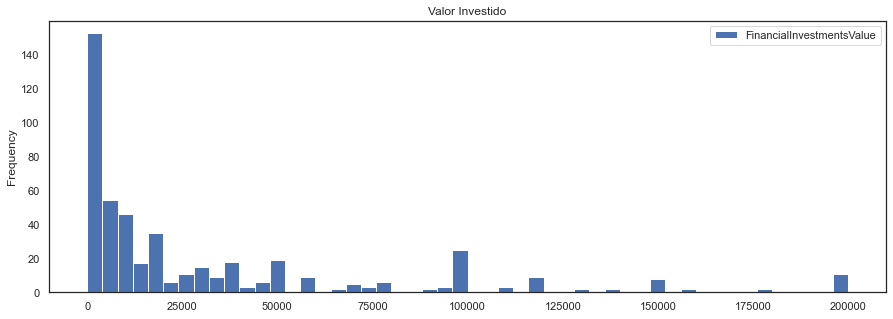

In [818]:
df_profile[['FinancialInvestmentsValue']].plot.hist(bins = 50, title = 'Valor Investido')

___

In [862]:
# Unindo os dataframes para enriquecer a base
df_client = pd.merge(left = df_profile, right = df_transactions, left_on='CustomerId', right_on = 'CustomerId')

df_client.reset_index().set_index('index')
df_client.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance,Id,Direction,Amount,OperatedAt,Month,Year
0,5f562b1a8a70670017ab6457,147955,10841,2020-09-07 12:55:00,200.0,14,0,5236,100.0,32,17.50,1191683,10,300.0,2021-01-04 00:00:00,1,2021
1,5d5c0fa92ec67600101b1268,94233,15583,2019-08-20 15:27:30,100.0,33,9,0,1450.0,25,15.00,1199156,10,500.0,2021-01-04 00:00:00,1,2021
2,5d5c0fa92ec67600101b1268,94233,15583,2019-08-20 15:27:30,100.0,33,9,0,1450.0,25,15.00,1199147,10,500.0,2021-01-04 00:00:00,1,2021
3,5f46553c3c2f2b001775afa9,146423,21255,2020-08-26 13:24:54,5000.0,23,0,5000,25000.0,39,24.00,1198284,10,600.0,2021-01-04 00:00:00,1,2021
4,5e0e26482e23270010d3a197,158679,0,2020-12-09 19:01:29,1000.0,64,16,15000000,70000.0,32,71.97,1162716,10,109.0,2021-01-15 16:36:32,1,2021


In [863]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerApiid              13 non-null     object        
 1   CustomerId                 13 non-null     int64         
 2   AUM                        13 non-null     int32         
 3   RegisterDate               13 non-null     datetime64[ns]
 4   AmountFirstDeposit         13 non-null     float64       
 5   TotalDeposits              13 non-null     int64         
 6   TotalWithdrawals           13 non-null     int64         
 7   MonthlyIncome              13 non-null     int32         
 8   FinancialInvestmentsValue  13 non-null     float64       
 9   Age                        13 non-null     int64         
 10  ComputedRiskTolerance      13 non-null     float64       
 11  Id                         13 non-null     int64         
 12  Direction 

In [ ]:
#gráfico de dispersão
sns.pairplot(data = df_profile, vars=['Age','MonthlyIncome','FinancialInvestmentsValue'])
plt.show()

### Cálculo de correlação

In [826]:
round(df_profile.corr(), 3)

,CustomerId,AUM,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance
CustomerId,1.000,-0.085,0.044,-0.539,-0.341,0.023,-0.050,0.068,0.183
AUM,-0.085,1.000,0.804,0.371,0.156,-0.012,0.305,0.214,0.041
AmountFirstDeposit,0.044,0.804,1.000,0.169,0.060,-0.007,0.186,0.237,0.022
TotalDeposits,-0.539,0.371,0.169,1.000,0.453,0.094,0.178,0.008,0.004
TotalWithdrawals,-0.341,0.156,0.060,0.453,1.000,0.100,0.011,-0.033,-0.103
MonthlyIncome,0.023,-0.012,-0.007,0.094,0.100,1.000,0.040,0.020,0.120
FinancialInvestmentsValue,-0.050,0.305,0.186,0.178,0.011,0.040,1.000,0.303,0.245
Age,0.068,0.214,0.237,0.008,-0.033,0.020,0.303,1.000,0.035
ComputedRiskTolerance,0.183,0.041,0.022,0.004,-0.103,0.120,0.245,0.035,1.000


<AxesSubplot:>

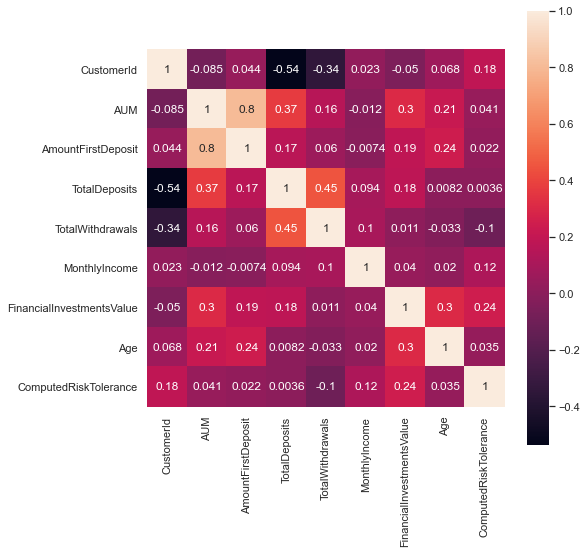

In [827]:
plt.figure(figsize=(8,8))
sns.heatmap(df_profile.corr(), annot=True, square=True)

#annot traz os números - annotation
#square=True torna o gráfico quadrado


In [724]:
'''df_profile.sort_values(by=['Age'], inplace=True, ascending=True)
df_profile.reset_index(inplace=True)
df_profile.head()'''

"df_profile.sort_values(by=['Age'], inplace=True, ascending=True)\ndf_profile.reset_index(inplace=True)\ndf_profile.head()"

In [897]:
'''ax = sns.countplot(x="Age", data=df_profile, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
display()'''

'ax = sns.countplot(x="Age", data=df_profile, palette="rocket")\nax.set_xticklabels(ax.get_xticklabels(), rotation=90)\ndisplay()'

In [898]:
'''ax = sns.countplot(x="Age", data=df_customers, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
display()'''

'ax = sns.countplot(x="Age", data=df_customers, palette="rocket")\nax.set_xticklabels(ax.get_xticklabels(), rotation=90)\ndisplay()'

___

# Insigts

- Calcular transações de entrada por mês:
    - desmembrar coluna data criando coluna mês - ok
    - plotar gráfico sobre entradas - ok

- quais clientes saíram da plataforma? - ok
    fazer um agrupamento mensal - ok
    plotar gráfico de saída mensal - ok
- pegar todos os clientes que saíram ==20 - ok
- df de pessoas que saíram
- calcular o valor total dos que saíram / e mensal - ok
- análises de eventos e clientes com a base reduzida (justificar na célula)


DUVIDAS: 

- como comparar as saídas com os períodos passados?
- Qual a previsão para os próximos meses? COMO CALCULAR? FAÇO UMA REGRESSÃO?

## Como cada público impacta na arrecadação?
- como fazer este cálculo a partir da data, quantidade de operações e valores

In [921]:
df_client2 = pd.merge(df_customers, df_transactions, how = 'outer')

df_client2.reset_index(drop=True, inplace=True)
df_client2.head()


,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance,Id,Direction,Amount,OperatedAt,Month,Year
0,60a7d0011363ea0011d0eb80,192260,601.0,2021-06-10 21:23:31,100.013269,5.0,0.0,250.0,3000.0,14.0,22.22,NaN,NaN,NaN,NaT,NaN,NaN
1,60c77e1ffdaebd001875353e,192853,1798.0,2021-06-14 16:13:56,300.048411,2.0,0.0,8000.0,180000.0,35.0,77.78,NaN,NaN,NaN,NaT,NaN,NaN
2,588f45ae0a760bb65b380afa,11897,1621.0,2017-09-14 12:08:06,2500.000000,13.0,2.0,4500.0,0.0,32.0,17.00,NaN,NaN,NaN,NaT,NaN,NaN
3,5915d73623d4b1881694e11e,12583,78643.0,2017-09-25 15:44:40,2005.000000,37.0,7.0,18000.0,120000.0,34.0,69.17,NaN,NaN,NaN,NaT,NaN,NaN
4,591f5f3b3daa47c6488bce3f,5564,422.0,2017-05-22 18:38:05,2000.000000,23.0,7.0,2000.0,45000.0,29.0,0.00,NaN,NaN,NaN,NaT,NaN,NaN


In [922]:
df_client2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerApiid              1005 non-null   object        
 1   CustomerId                 1975 non-null   int64         
 2   AUM                        1005 non-null   float64       
 3   RegisterDate               1005 non-null   datetime64[ns]
 4   AmountFirstDeposit         1005 non-null   float64       
 5   TotalDeposits              1005 non-null   float64       
 6   TotalWithdrawals           1005 non-null   float64       
 7   MonthlyIncome              1005 non-null   float64       
 8   FinancialInvestmentsValue  1005 non-null   float64       
 9   Age                        1005 non-null   float64       
 10  ComputedRiskTolerance      1005 non-null   float64       
 11  Id                         1000 non-null   float64       
 12  Direct

In [923]:
#Agrupamento por faixa de idade tendo como referência os relatórios do IBGE

df_client2['Age'] = df_client2['Age'].apply(lambda x: '0-18' if x >= 0 and x <= 18
                                                else('20-24' if x <= 24
                                                else('25-29' if x <= 29
                                                else('30-34' if x <= 34
                                                else('35-39' if x <= 39
                                                else('40-44' if x <= 44
                                                else('45-49' if x <= 49
                                                else('50-54' if x <= 54
                                                else('55-59' if x <= 59
                                                else('60-69' if x <= 69
                                                else('70+' if x >= 70
                                                else(x))))))))))))


In [924]:
df_client2['Age'].value_counts()

25-29    247
30-34    234
20-24    151
35-39    144
40-44     74
45-49     39
55-59     33
60-69     29
50-54     26
0-18      19
70+        9
Name: Age, dtype: int64

In [960]:
#Média de depósitos por cliente
print('Média de depósitos por cliente:', df_client2['TotalDeposits'].mean())

Média de depósitos por cliente: 18.937313432835822


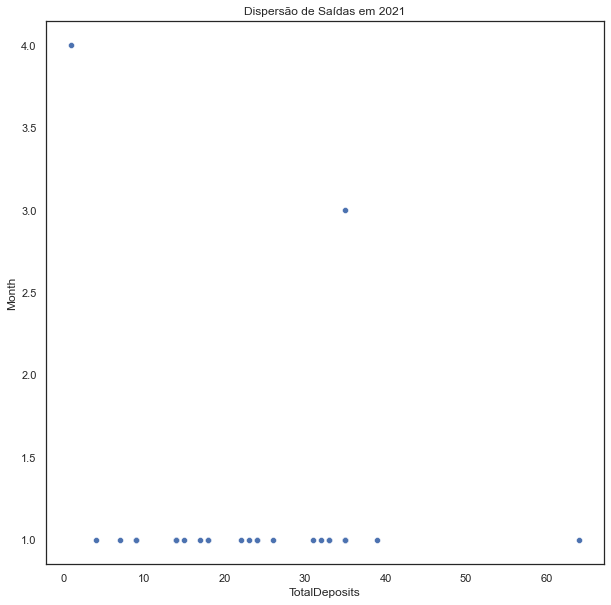

In [941]:
sns.set_style("white")
plt.figure(figsize=(10, 10))
plt.title('Dispersão de Saídas em 2021')

# Gráfico de Dispersão
g = sns.scatterplot(x="TotalDeposits", y="Month", 
                    data=df_client2)
plt.show()

#### A média de depósitos por cliente vai sofrendo alterações ao longo do tempo. Contudo, é possível observar uma maior ocorrência durante o mês de Janeiro de 2021 para aqueles que fizeram até 40 depósitos neste período. 

In [963]:
df_retirada = df_client2[df_client2['Direction'] == 20]
df_retirada.reset_index(drop=True, inplace=True)

In [964]:
df_retirada

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance,Id,Direction,Amount,OperatedAt,Month,Year
0,5f3b10d285d46700179dda7f,145424,7915.0,2020-08-18 11:53:53,16800.0,14.0,10.0,2500.0,17000.0,45-49,12.0,1200158.0,20.0,200.000000,2021-01-04 12:08:48,1.0,2021.0
1,5e17638233bb300010579f70,118701,1430.0,2020-01-09 18:00:03,150.0,26.0,9.0,3000.0,5000.0,60-69,0.0,1201803.0,20.0,720.000000,2021-01-04 12:07:05,1.0,2021.0
2,5efc7e5b5ebb81001038e9cb,139550,684.0,2020-07-01 21:15:52,100.0,7.0,1.0,6000.0,20000.0,30-34,23.5,1198365.0,20.0,1500.000000,2021-01-04 12:06:18,1.0,2021.0
3,59e04c758610ac0555c7d910,14180,137.0,2017-10-13 14:25:59,100.0,31.0,13.0,300.0,0.0,25-29,14.0,1200077.0,20.0,5000.000000,2021-01-04 12:05:18,1.0,2021.0
4,5eebd4120ab3400018e5ff9d,138305,0.0,2020-06-19 00:42:28,1000.0,9.0,2.0,3000.0,12000.0,30-34,17.5,1199276.0,20.0,3167.295414,2021-01-04 12:05:47,1.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,NaN,60472,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1181600.0,20.0,442.950000,2021-01-11 11:59:39,1.0,2021.0
184,NaN,20312,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1201964.0,20.0,3052.630000,2021-01-11 11:59:57,1.0,2021.0
185,NaN,80707,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1074424.0,20.0,1630.000000,2021-01-19 11:58:53,1.0,2021.0
186,NaN,82264,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1189325.0,20.0,50000.000000,2021-01-26 12:23:34,1.0,2021.0


### Tendo em vista os clientes que retiram o dinheiro da Warren, quantas pessoas zeram suas quantias na Warren? Existe um público dominante?

In [967]:
#aum valor que o cliente possui na warren
#direction 20 para retirada
#customerid cliente


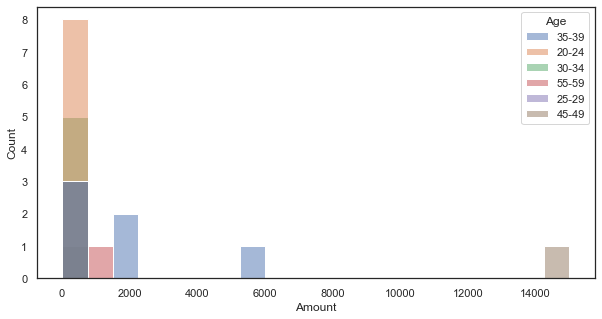

In [860]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_client2, x='Amount', bins=20, hue='Age')
plt.show()

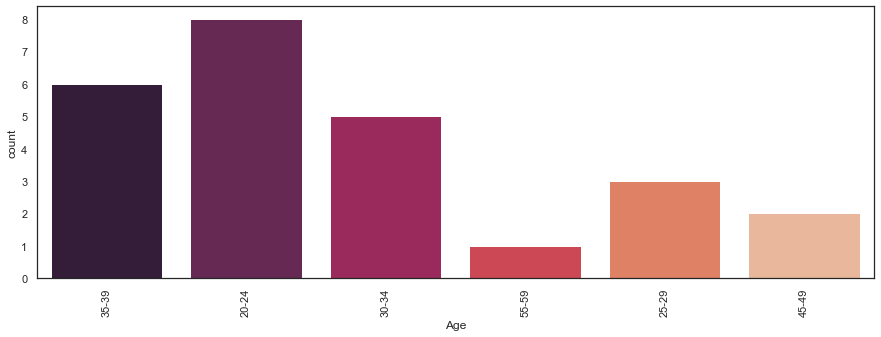

In [868]:
ax = sns.countplot(x='Age', data=df_client2, palette = 'rocket')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
display()

### Ao que parece, o público de 20 e 39 anos contribuem expressivamente o crescimento da empresa, sendo que a faixa etária entre 25 e 29 anos tem um número um pouco menos expressivo e entre 20 a 24 anos se encontra o público com maior impacto

___

## Quantos depósitos cada cliente faz em média por período de tempo? Essa taxa muda por público?

In [920]:
df_client2.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance,Id,Direction,Amount,OperatedAt,Month,Year
67,597d1f93ad57cd674deb5dfd,64617,65413.0,2019-01-02 16:58:00,200.0,22.0,1.0,8000.0,0.0,35-39,24.0,1201605.0,10.0,2000.0,2021-01-04 09:31:27,1.0,2021.0
68,5a04bd4815a605790aff5c77,24431,0.0,2018-01-02 18:41:09,300.0,14.0,9.0,2000.0,0.0,20-24,13.5,1201889.0,10.0,100.0,2021-01-07 00:00:00,1.0,2021.0
98,5f562b1a8a70670017ab6457,147955,10841.0,2020-09-07 12:55:00,200.0,14.0,0.0,5236.0,100.0,30-34,17.5,1191683.0,10.0,300.0,2021-01-04 00:00:00,1.0,2021.0
131,5b8740c9d345ed000ed4a55c,55461,17797.0,2018-09-04 13:26:27,8000.0,32.0,3.0,20000.0,0.0,55-59,9.0,1189643.0,10.0,1200.0,2021-01-04 00:00:00,1.0,2021.0
173,58779257b93e5a4001f73dd5,1605,0.0,2017-02-09 15:39:26,200.0,9.0,15.0,4021.0,0.0,30-34,15.0,1199301.0,10.0,400.0,2021-01-04 00:00:00,1.0,2021.0


In [875]:
df_transactions2.reset_index(inplace=True)

In [883]:
df_customers2.head()

,CustomerApiid,CustomerId,AUM,RegisterDate,AmountFirstDeposit,TotalDeposits,TotalWithdrawals,MonthlyIncome,FinancialInvestmentsValue,Age,ComputedRiskTolerance
0,60a7d0011363ea0011d0eb80,192260,601,2021-06-10 21:23:31,100.013269,5,0,250,3000.0,14,22.22
1,60c77e1ffdaebd001875353e,192853,1798,2021-06-14 16:13:56,300.048411,2,0,8000,180000.0,35,77.78
2,588f45ae0a760bb65b380afa,11897,1621,2017-09-14 12:08:06,2500.000000,13,2,4500,0.0,32,17.00
3,5915d73623d4b1881694e11e,12583,78643,2017-09-25 15:44:40,2005.000000,37,7,18000,120000.0,34,69.17
4,591f5f3b3daa47c6488bce3f,5564,422,2017-05-22 18:38:05,2000.000000,23,7,2000,45000.0,29,0.00


In [896]:
df_customers2['TotalDeposits'].mean()

18.876

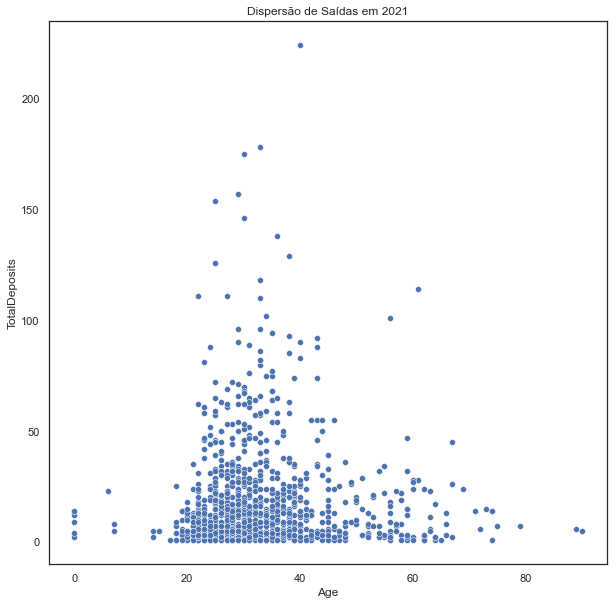

In [895]:
sns.set_style("white")
plt.figure(figsize=(10, 10))
plt.title('Dispersão de Saídas em 2021')

# Gráfico de Dispersão
g = sns.scatterplot(x="Age", y="TotalDeposits", 
                    data=df_customers2)
plt.show()

In [912]:
df_depositos = df_transactions

In [913]:
df_depositos['CustomerId'].value_counts()

80912     9
160362    9
111744    7
96836     6
51305     5
         ..
82827     1
159152    1
56210     1
136083    1
44093     1
Name: CustomerId, Length: 815, dtype: int64

In [ ]:
# Direction, CustomerId, Month

In [914]:
df_depositos = df_depositos[df_depositos['Direction'] == 10]
df_depositos.head()

,Id,Direction,Amount,CustomerId,OperatedAt,Month,Year
260,1193306,10,12800.0,12431,2021-01-01 00:00:30,1,2021
573,1200034,10,20000.0,117985,2021-01-01 00:01:33,1,2021
452,1198402,10,50.0,95724,2021-01-01 00:02:08,1,2021
521,1199295,10,200.0,136323,2021-01-01 00:02:35,1,2021
486,1198878,10,2000.0,138207,2021-01-01 00:02:58,1,2021


In [915]:
df_depositos.reset_index(drop=True, inplace=True)

In [916]:
df_depositos.head()

,Id,Direction,Amount,CustomerId,OperatedAt,Month,Year
0,1193306,10,12800.0,12431,2021-01-01 00:00:30,1,2021
1,1200034,10,20000.0,117985,2021-01-01 00:01:33,1,2021
2,1198402,10,50.0,95724,2021-01-01 00:02:08,1,2021
3,1199295,10,200.0,136323,2021-01-01 00:02:35,1,2021
4,1198878,10,2000.0,138207,2021-01-01 00:02:58,1,2021


In [919]:
df_depositos['CustomerId'].unique().mean()

94377.21375186846